# Image Classification with CNN - LeNet5 architecture

In this exercise, we will apply the LeNet5 algorithm to the Fashion MNIST dataset and improve your performances.

We will first download the data:

In [4]:
# TODO: Load the dataset
from tensorflow.keras.datasets import fashion_mnist #type: ignore

(XTrain, yTrain), (XTest, yTest) = fashion_mnist.load_data()

# # # If your computer is slow, try to use a subset of data, e.g.
# XTrain = XTrain[:10000]
# yTrain = yTrain[:10000]
# XTest = XTest[:2000]
# yTest = yTest[:2000]
XTrain.shape

(60000, 28, 28)

As you already know, this dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

You can have a look at some images if needed, even if you already know them.

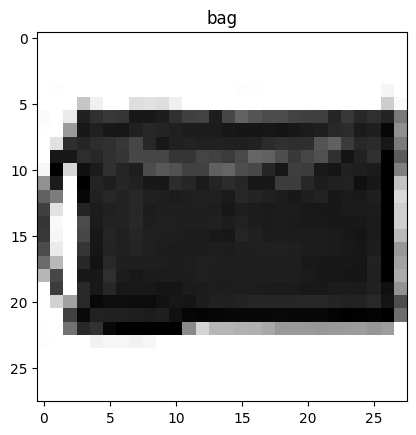

In [5]:
# TODO: Explore the data, display some input images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

labelClass = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(XTrain.shape[0])

plt.imshow(XTrain[idx], cmap = "gray_r")
plt.title(labelClass[yTrain[idx]])
plt.show()

Make the data preparation and preprocessing: scale and reshape the data, put the labels to the good shape.

In [6]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical #type: ignore

yTrainCat = to_categorical(yTrain, num_classes = 10)
yTestCat = to_categorical(yTest, num_classes = 10)

XTrainNorm = XTrain / 255
XTestNorm = XTest / 255

XTrainNorm = XTrainNorm.reshape(60000, 28, 28, 1)
XTestNorm = XTestNorm.reshape(10000, 28, 28, 1)

XTrainNorm.shape #Should be (60000, 28, 28, 1)

(60000, 28, 28, 1)

Now build the LeNet5 architecture. You can reuse the one of the course, or try to build it by yourself.

The architecture is the following:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1WteTU2FPIVMkBKmMxGpFm5OjsX-szTbB">
</p>

In [7]:
# TODO: Build your model
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense #type: ignore


def lenet5():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, name='C1', kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2), name='S2'))
    # Layer C3
    model.add(Conv2D(filters=16, name='C3', kernel_size=(3,3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2), name='S4'))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation = 'relu', name='C5'))
    # Layer F6
    model.add(Dense(units=84, activation = 'relu', name = 'F6'))
    # Output layer
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model

model = lenet5()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 26, 26, 6)         60        
                                                                 
 S2 (MaxPooling2D)           (None, 13, 13, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 11, 11, 16)        880       
                                                                 
 S4 (MaxPooling2D)           (None, 5, 5, 16)          0         
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 C5 (Dense)                  (None, 120)               48120     
                                                                 
 F6 (Dense)                  (None, 84)                1

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [9]:
# TODO: Compile and fit your model
import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True' #https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial


from tensorflow.keras.callbacks import EarlyStopping #type: ignore
from tensorflow.keras.callbacks import TensorBoard #type: ignore

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define now our callbacks
# callbacks = [EarlyStopping(monitor='val_loss', patience=10), TensorBoard(log_dir='./keras-logs', histogram_freq=0, write_graph=True, write_images=True)]
callbacks = [EarlyStopping(monitor='val_loss', patience=10)]

# Finally fit the model
model.fit(x=XTrainNorm, y=yTrainCat, validation_data=(XTestNorm, yTestCat), epochs=100, batch_size=2048, callbacks=callbacks)

Epoch 1/100
30/30 [==============================] - 4s 104ms/step - loss: 1.5950 - accuracy: 0.4772 - val_loss: 0.9212 - val_accuracy: 0.6608
Epoch 2/100
30/30 [==============================] - 3s 100ms/step - loss: 0.7931 - accuracy: 0.7060 - val_loss: 0.7375 - val_accuracy: 0.7014
Epoch 3/100
30/30 [==============================] - 3s 100ms/step - loss: 0.6581 - accuracy: 0.7546 - val_loss: 0.6385 - val_accuracy: 0.7664
Epoch 4/100
30/30 [==============================] - 3s 101ms/step - loss: 0.5863 - accuracy: 0.7829 - val_loss: 0.5811 - val_accuracy: 0.7891
Epoch 5/100
30/30 [==============================] - 3s 106ms/step - loss: 0.5416 - accuracy: 0.8015 - val_loss: 0.5517 - val_accuracy: 0.7913
Epoch 6/100
30/30 [==============================] - 3s 101ms/step - loss: 0.5129 - accuracy: 0.8105 - val_loss: 0.5190 - val_accuracy: 0.8088
Epoch 7/100
30/30 [==============================] - 3s 101ms/step - loss: 0.4851 - accuracy: 0.8235 - val_loss: 0.4983 - val_accuracy: 0.8180

Have a look at the tensorboard and see if it gives a deeper understanding of your model.

Compute then the accuracy of your model. Is it better than a regular MLP used before?

In [14]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size = 2048
yPredTrain = to_categorical(model.predict(XTrainNorm).argmax(axis=1), num_classes=10)
yPredTest = to_categorical(model.predict(XTestNorm).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(yPredTrain, yTrainCat))
print('accuracy on test with NN:', accuracy_score(yPredTest, yTestCat))

313/313 [==============================] - 1s 2ms/step
accuracy on train with NN: 0.92405
accuracy on test with NN: 0.8985


We will now add image augmentation to improve our results, especially we will try to reduce overfitting this way.

To do so, you can use `ImageDataGenerator` from Keras that makes all the work for you (including rescaling), with the following parameter: 
* `horizontal_flip=True`

For more info about how the `ImageDataGenerator` works, you can check out [this article](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/).

Begin by creating an object `ImageDataGenerator` with this parameter.

In [12]:
# TODO: Instantiate an ImageDataGenerator object
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type: ignore

datagen = ImageDataGenerator(horizontal_flip = True)

Finally, you can train your model using this generator, with the method `fit_generator` of your model and the method `flow` of your `ImageDataGenerator`.

In [18]:
# TODO: train your model
batch_size = 2048
model.fit_generator(datagen.flow(XTrainNorm, yTrainCat, batch_size=batch_size),
                    validation_data=(XTestNorm, yTestCat), callbacks=callbacks,
                    steps_per_epoch=len(XTrainNorm) / batch_size, epochs=100)

Epoch 1/100


C:\Users\Admin\AppData\Local\Temp\ipykernel_4804\4217090608.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(XTrainNorm, yTrainCat, batch_size=batch_size),


29/29 [==============================] - 4s 123ms/step - loss: 0.1987 - accuracy: 0.9261 - val_loss: 0.2835 - val_accuracy: 0.9011
Epoch 2/100
29/29 [==============================] - 4s 119ms/step - loss: 0.1955 - accuracy: 0.9282 - val_loss: 0.2815 - val_accuracy: 0.9007
Epoch 3/100
29/29 [==============================] - 4s 133ms/step - loss: 0.1966 - accuracy: 0.9271 - val_loss: 0.2952 - val_accuracy: 0.8965
Epoch 4/100
29/29 [==============================] - 4s 132ms/step - loss: 0.1992 - accuracy: 0.9256 - val_loss: 0.2796 - val_accuracy: 0.8996
Epoch 5/100
29/29 [==============================] - 4s 130ms/step - loss: 0.1984 - accuracy: 0.9273 - val_loss: 0.2813 - val_accuracy: 0.9016
Epoch 6/100
29/29 [==============================] - 4s 121ms/step - loss: 0.1941 - accuracy: 0.9287 - val_loss: 0.2865 - val_accuracy: 0.8967
Epoch 7/100
29/29 [==============================] - 4s 123ms/step - loss: 0.1941 - accuracy: 0.9289 - val_loss: 0.2863 - val_accuracy: 0.8985
Epoch 8/100

Recompute the accuracy of your model, does it improve your performances with data augmentation?

In [20]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size=1024
yPredTrain = to_categorical(model.predict(XTrainNorm).argmax(axis=1), num_classes=10)
yPredTest = to_categorical(model.predict(XTestNorm).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(yPredTrain, yTrainCat))
print('accuracy on test with NN:', accuracy_score(yPredTest, yTestCat))

313/313 [==============================] - 1s 2ms/step
accuracy on train with NN: 0.9310666666666667
accuracy on test with NN: 0.8989


You can now try to improve even more your results. For example, add more parameters to your `ImageDataGenerator`, play with some hyperparameters, and so on...